In [1]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from skimage.morphology import (erosion, dilation, closing, opening)

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:60% !important; }</style>"))

# **ACTIVITY 6: MORPHOLOGICAL OPERATIONS**

## **ACTIVITY 6.1**

## **Creating the images**

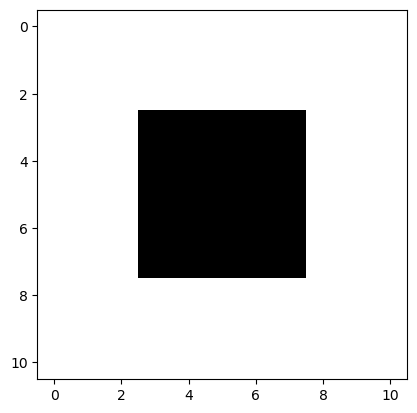

In [3]:
# 5x5 square
# Fill in the canvas with zeros
# We pad the image so that we have space for the following morphological operations i.e. in dilation
square = np.zeros([11,11])
# The 5x5 square pattern is filled in with ones
square[3:8, 3:8] = 1
# Show image in reversed gray map for better visualization
plt.imshow(square, cmap='gray_r')
plt.savefig("/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT6/5x5square.png", dpi = 300, bbox_inches='tight', transparent = True)

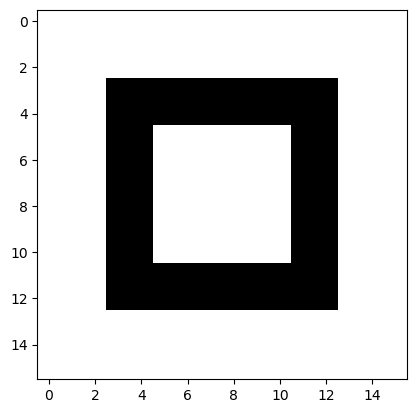

In [4]:
# 10x10 square, 2 boxes thick
# Fill in the canvas with zeros
# We pad the canvas again for dilation
box = np.zeros([16,16])
# The pattern is filled in with ones
box[3:13, 3:5] = 1
box[3:13, 11:13] = 1
box[3:5, 3:13] = 1
box[11:13, 3:13] = 1

# Show image in reversed gray map for better visualization
plt.imshow(box, cmap='gray_r')
plt.savefig("/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT6/10x10square.png", dpi = 300, bbox_inches='tight', transparent = True)

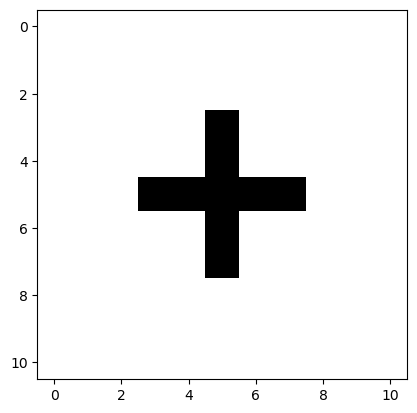

In [5]:
# Plus sign, 5 boxes along each line
# Fill in the canvas with zeros
# Padding the canvas for dilation
plus = np.zeros([11,11])
# The pattern is filled in with ones
plus[3:8,5]=1
plus[5,3:8]=1
# Show image in reversed gray map for better visualization
plt.imshow(plus, cmap='gray_r')
plt.savefig("/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT6/plus.png", dpi = 300, bbox_inches='tight', transparent = True)

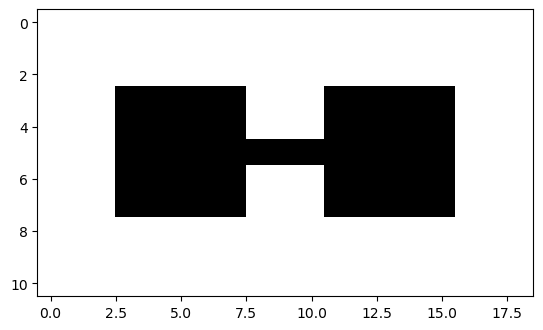

In [6]:
# dumbbell, 2 5x5 squares connected by a 3x1 line
# Fill in the canvas with zeros
# Padding the canvas for dilation
dumbbell = np.zeros([11, 19])
# The pattern is filled in with ones
dumbbell[3:8, 3:8] = 1
dumbbell[3:8, 11:16] = 1
dumbbell[5, 8:11] = 1
# Show image in reversed gray map for better visualization
plt.imshow(dumbbell, cmap='gray_r')
plt.savefig("/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT6/dumbbell.png", dpi = 300, bbox_inches='tight', transparent = True)

## **Creating the structuring elements**

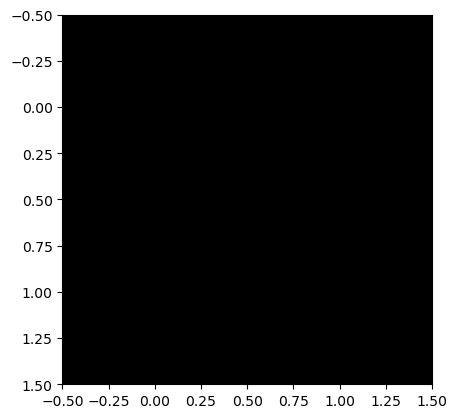

In [7]:
# 2x2 ones
se1 = np.ones([2,2], dtype=np.uint8)
plt.imshow(se1, cmap='gray')
#plt.axis('off')
plt.savefig("/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT6/2x2_se.png", dpi = 300, bbox_inches='tight')

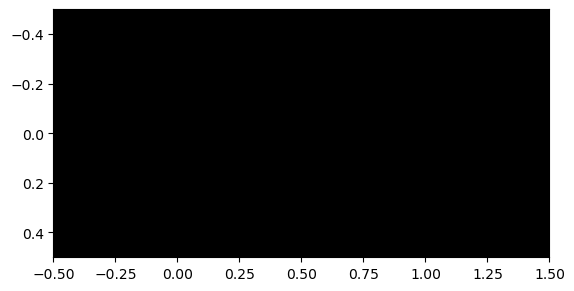

In [8]:
# 2x1 ones
se2 = np.ones([1,2], dtype=np.uint8)
plt.imshow(se2, cmap='gray')
#plt.axis('off')
plt.savefig("/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT6/2x1_se.png", dpi = 300, bbox_inches='tight')

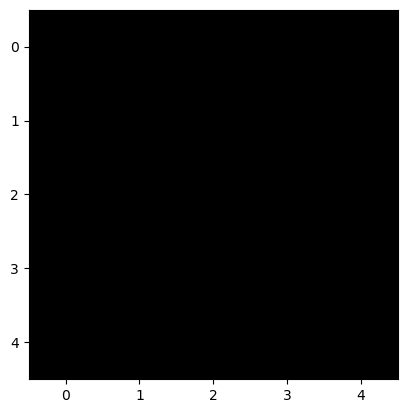

In [9]:
# 5x5 square
se3 = np.ones([5,5], dtype=np.uint8)
plt.imshow(se3, cmap='gray')
#plt.axis('off')
plt.savefig("/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT6/5x5_se.png", dpi = 300, bbox_inches='tight')

## **EROSION**

In [10]:
# We erode each shape by each structuring element
# The anchor parameter is varied to set the origin of the structuring element
# 5x5 square erosion
esq1 = cv2.erode(square, se1, anchor=(0,0))
esq2 = cv2.erode(square, se2, anchor=(0,0))
esq3 = cv2.erode(square, se3, anchor=(2,2))
# 10x10 square erosion
ebx1 = cv2.erode(box, se1, anchor=(0,0))
ebx2 = cv2.erode(box, se2, anchor=(0,0))
ebx3 = cv2.erode(box, se3, anchor=(2,2))
# plus sign erosion
epls1 = cv2.erode(plus, se1, anchor=(0,0))
epls2 = cv2.erode(plus, se2, anchor=(0,0))
epls3 = cv2.erode(plus, se3, anchor=(2,2))
# dumbbell erosion
edmb1 = cv2.erode(dumbbell, se1, anchor=(0,0))
edmb2 = cv2.erode(dumbbell, se2, anchor=(0,0))
edmb3 = cv2.erode(dumbbell, se3, anchor=(2,2))

# Store each set of erosion operations in separate lists
eroded_square = [esq1, esq2, esq3]
eroded_box = [ebx1, ebx2, ebx3]
eroded_plus = [epls1, epls2, epls3]
eroded_dumbbell = [edmb1, edmb2, edmb3]

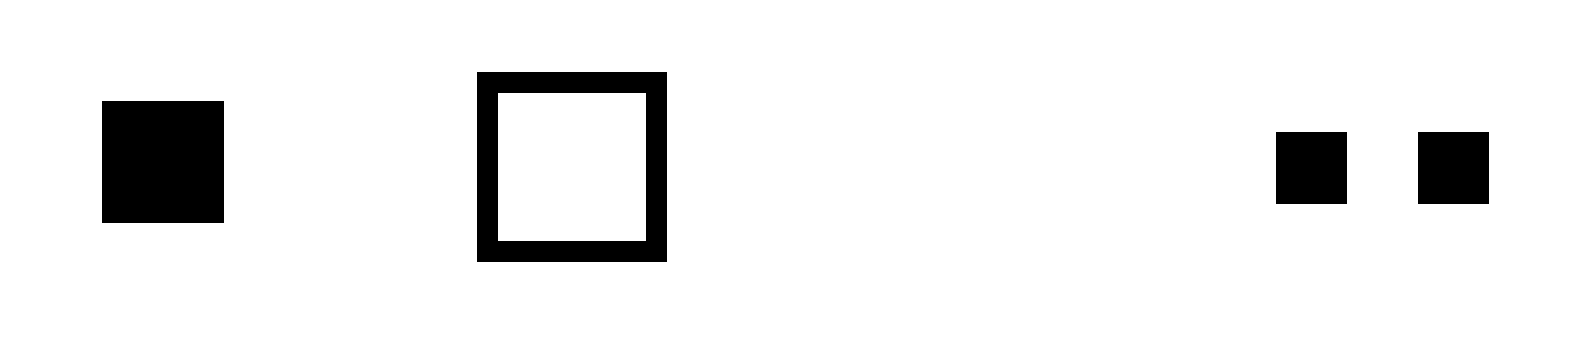

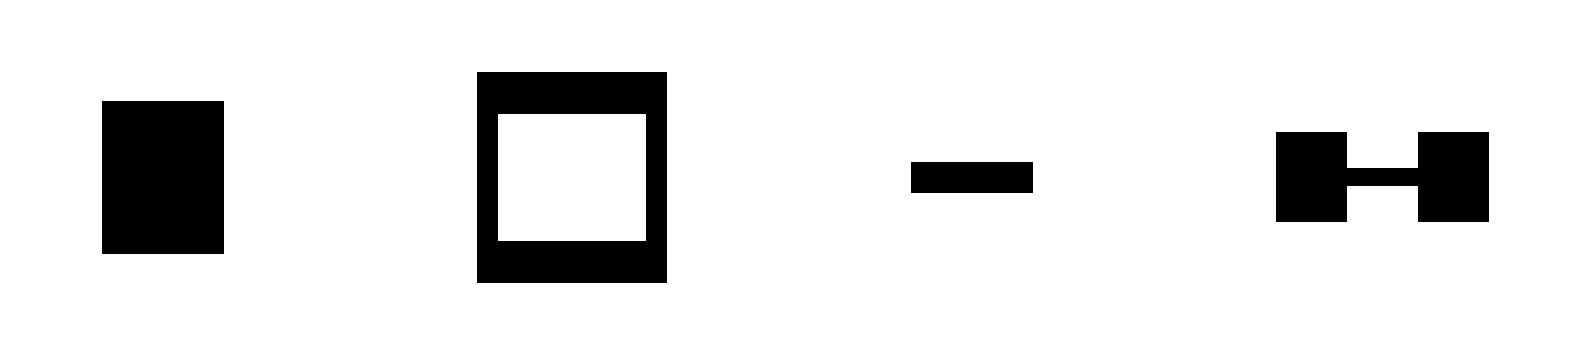

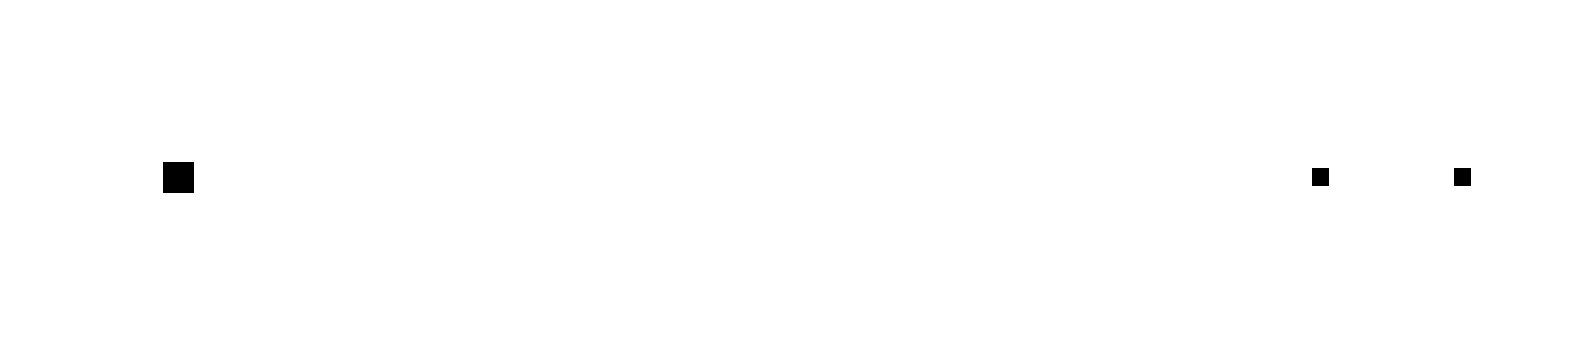

In [11]:
# Plot each set of erosion operations for a specific structuring element
for i in range(3):
    plt.figure(figsize=(20,15))
    # first subplot for 5x5 square erosion
    plt.subplot(3,4,i*4+1)
    plt.imshow(eroded_square[i], cmap='gray_r')
    plt.axis('off')
    # second subplot for 10x10 square erosion
    plt.subplot(3,4,i*4+2)
    plt.imshow(eroded_box[i], cmap='gray_r')
    plt.axis('off')
    # third subplot for plus shape erosion
    plt.subplot(3,4,i*4+3)
    plt.imshow(eroded_plus[i], cmap='gray_r')
    plt.axis('off')
    # fourth subplot for dumbbell shape erosion
    plt.subplot(3,4,i*4+4)
    plt.imshow(eroded_dumbbell[i], cmap='gray_r')
    plt.axis('off')

    plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT6/' + str(i) + 'erosion_only.png', dpi = 300, bbox_inches='tight')
    plt.show()

**These are the resulting images after erosion. However, if we want to show the pixels that were eroded, we simply juxtapose the original shapes back to the plots.**

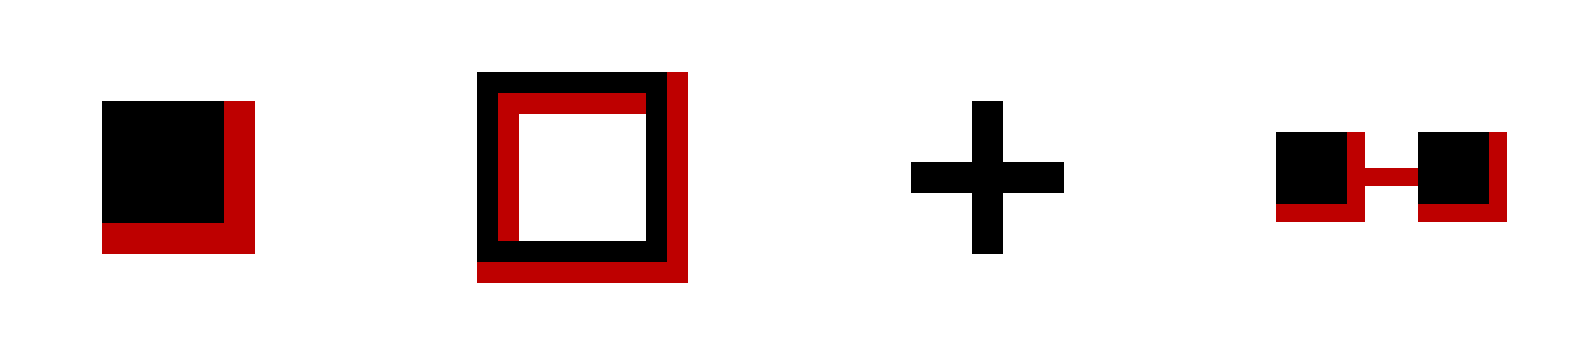

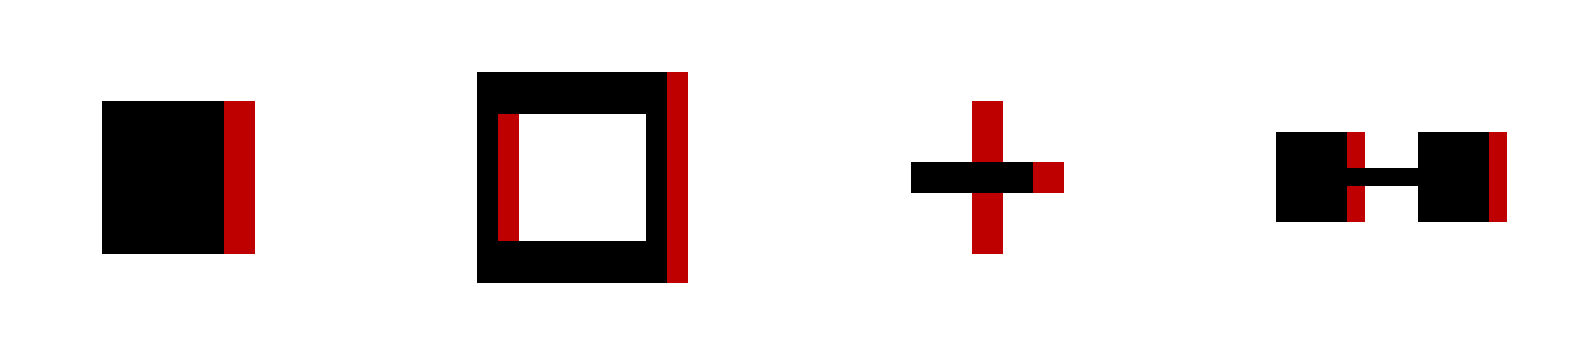

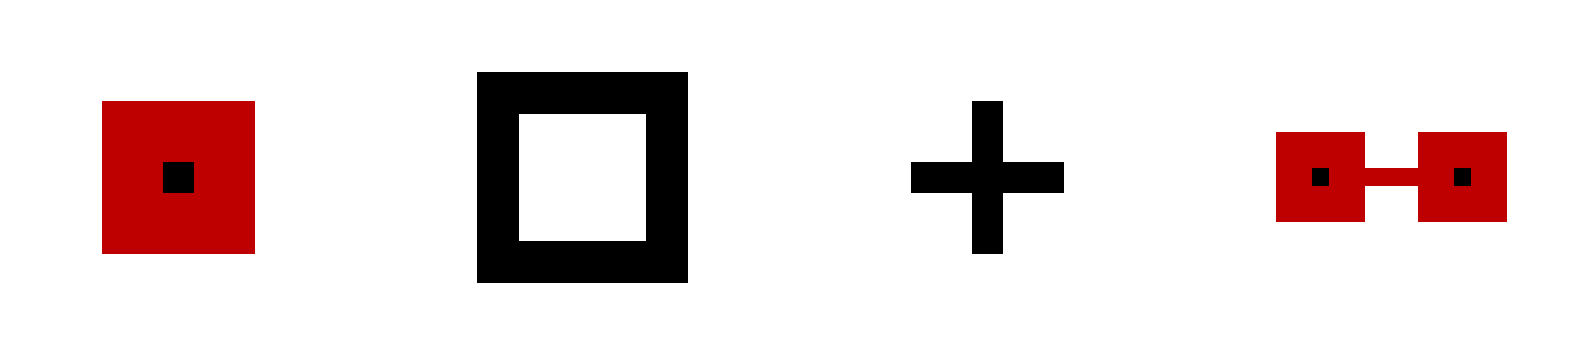

In [12]:
# Plot each set of erosion operations for a specific structuring element then add the original image in
for i in range(3):
    plt.figure(figsize=(20,15))
    # first subplot for 5x5 square erosion
    plt.subplot(3,4,i*4+1)
    plt.imshow(eroded_square[i]+square, cmap='gist_heat_r')
    plt.axis('off')
    # second subplot for 10x10 square erosion
    plt.subplot(3,4,i*4+2)
    plt.imshow(eroded_box[i]+box, cmap='gist_heat_r')
    plt.axis('off')
    # third subplot for plus shape erosion
    plt.subplot(3,4,i*4+3)
    plt.imshow(eroded_plus[i]+plus, cmap='gist_heat_r')
    plt.axis('off')
    # fourth subplot for dumbbell shape erosion
    plt.subplot(3,4,i*4+4)
    plt.imshow(eroded_dumbbell[i]+dumbbell, cmap='gist_heat_r')
    plt.axis('off')
    
    plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT6/' + str(i) + 'erosion_juxtaposed.png', dpi = 300, bbox_inches='tight')
    plt.show()

**The red parts of each image is where the erosion happened. For elements (1,3), (3,2), and (3,3); the entire shapes were eroded. Due to the nature of the for loop, we simply remark that these elements should be red instead of black.**

# **DILATION**

In [13]:
# We dilate each shape by each structuring element
# The anchor parameter is varied to set the origin of the structuring element
# 5x5 square dilation
dsq1 = cv2.dilate(square, se1, anchor=(1,1))
dsq2 = cv2.dilate(square, se2, anchor=(-1,-1))
dsq3 = cv2.dilate(square, se3, anchor=(2,2))
# 10x10 square dilation
dbx1 = cv2.dilate(box, se1, anchor=(1,1))
dbx2 = cv2.dilate(box, se2, anchor=(-1,-1))
dbx3 = cv2.dilate(box, se3, anchor=(2,2))
# plus sign dilation
dpls1 = cv2.dilate(plus, se1, anchor=(1,1))
dpls2 = cv2.dilate(plus, se2, anchor=(-1,-1))
dpls3 = cv2.dilate(plus, se3, anchor=(2,2))
# dumbbell dilation
ddmb1 = cv2.dilate(dumbbell, se1, anchor=(1,1))
ddmb2 = cv2.dilate(dumbbell, se2, anchor=(-1,-1))
ddmb3 = cv2.dilate(dumbbell, se3, anchor=(2,2))

# Store each set of dilation operations in separate lists
dilated_square = [dsq1, dsq2, dsq3]
dilated_box = [dbx1, dbx2, dbx3]
dilated_plus = [dpls1, dpls2, dpls3]
dilated_dumbbell = [ddmb1, ddmb2, ddmb3]

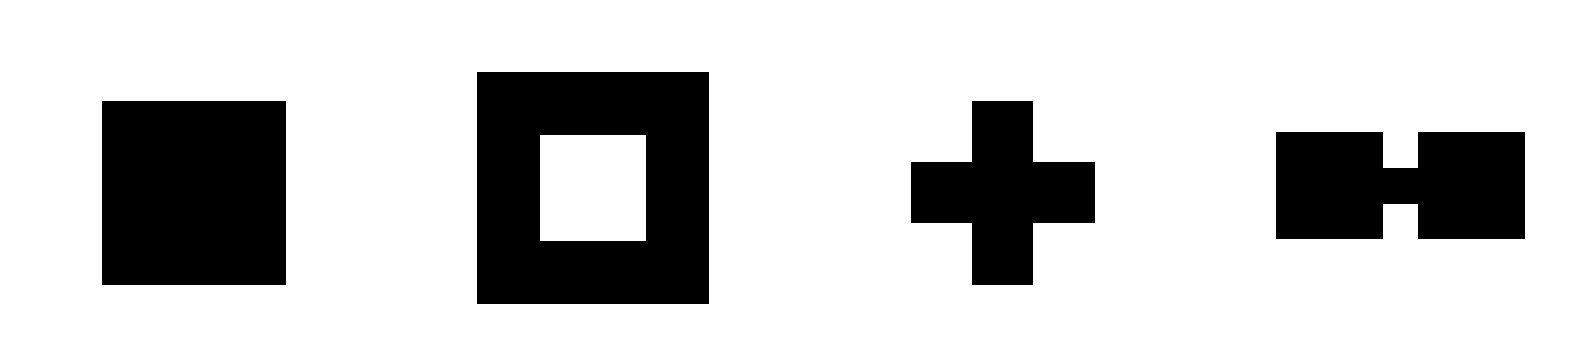

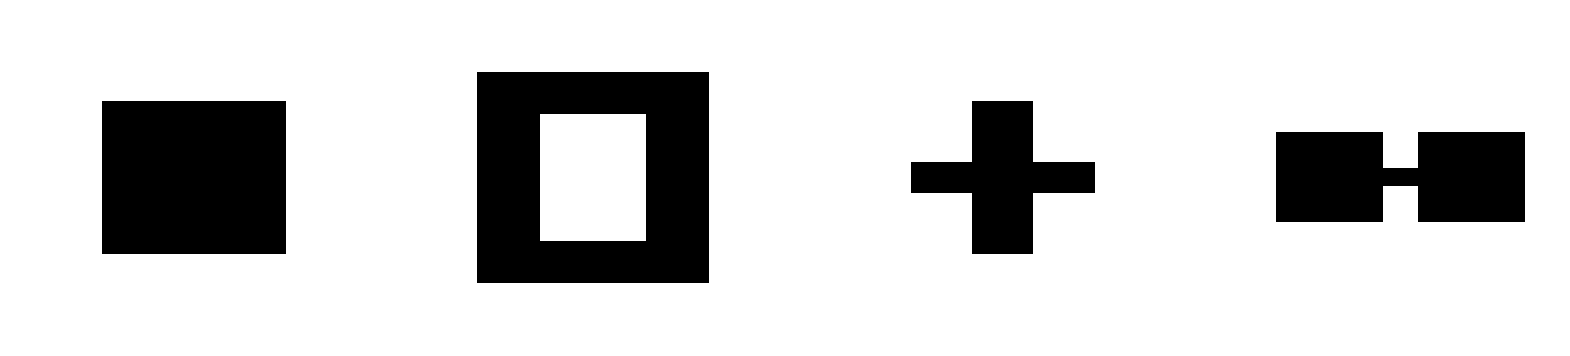

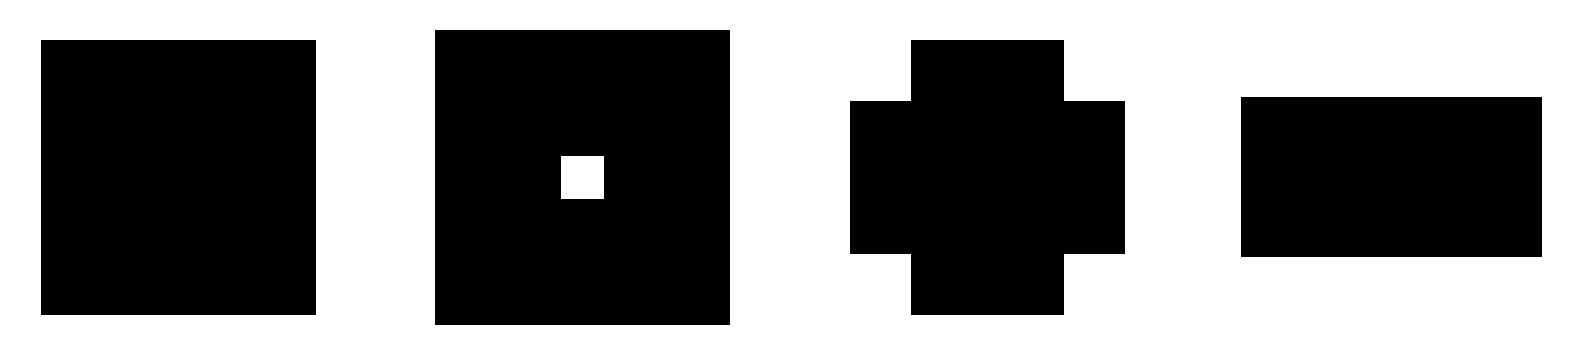

In [14]:
# Plot each set of dilation operations for a specific structuring element
for i in range(3):
    plt.figure(figsize=(20,15))
    # first subplot for 5x5 square dilation
    plt.subplot(3,4,i*4+1)
    plt.imshow(dilated_square[i], cmap='gray_r')
    plt.axis('off')
    # second subplot for 10x10 square dilation
    plt.subplot(3,4,i*4+2)
    plt.imshow(dilated_box[i], cmap='gray_r')
    plt.axis('off')
    # third subplot for plus shape dilation
    plt.subplot(3,4,i*4+3)
    plt.imshow(dilated_plus[i], cmap='gray_r')
    plt.axis('off')
    # fourth subplot for dumbbell shape dilation
    plt.subplot(3,4,i*4+4)
    plt.imshow(dilated_dumbbell[i], cmap='gray_r')
    plt.axis('off')

    plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT6/' + str(i) + 'dilated_only.png', dpi = 300, bbox_inches='tight')
    plt.show()

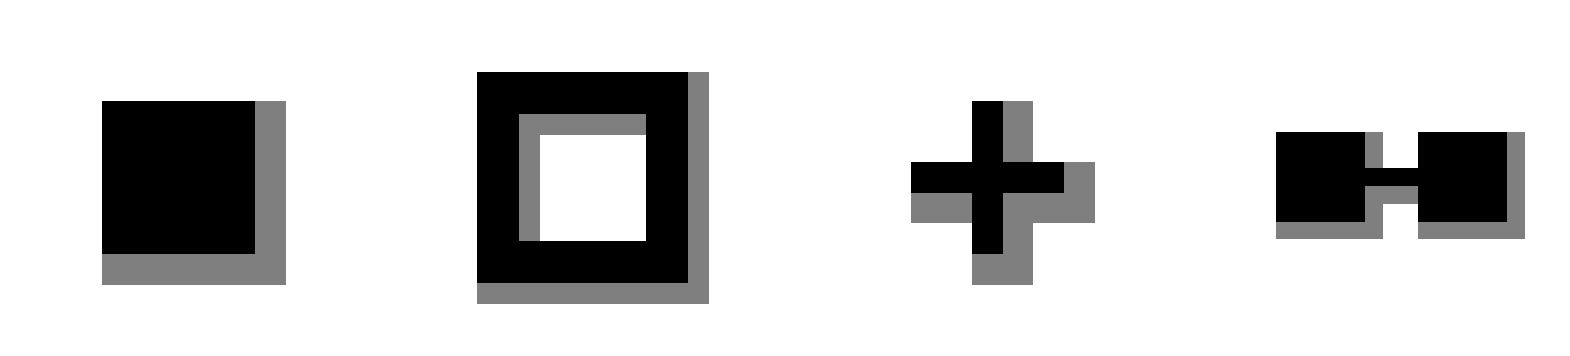

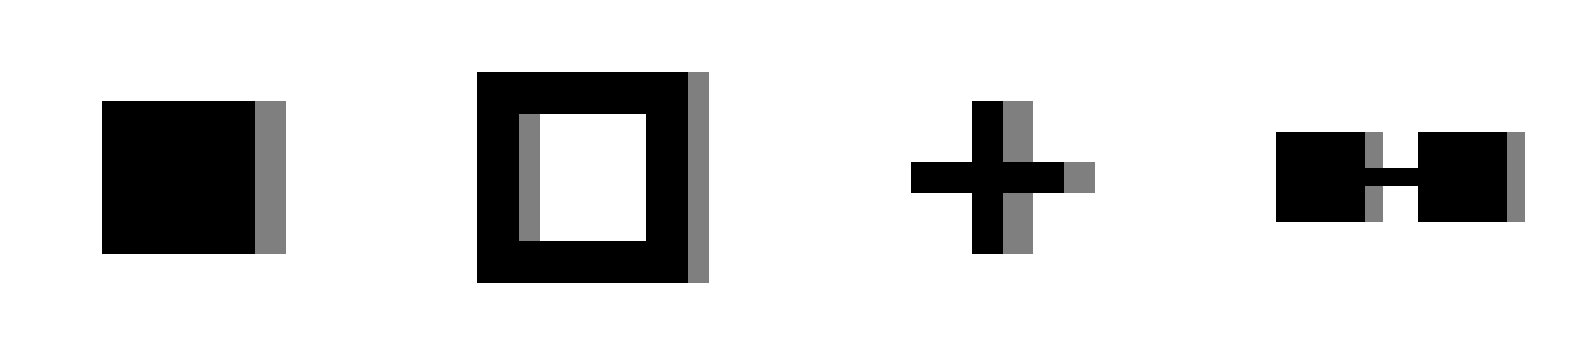

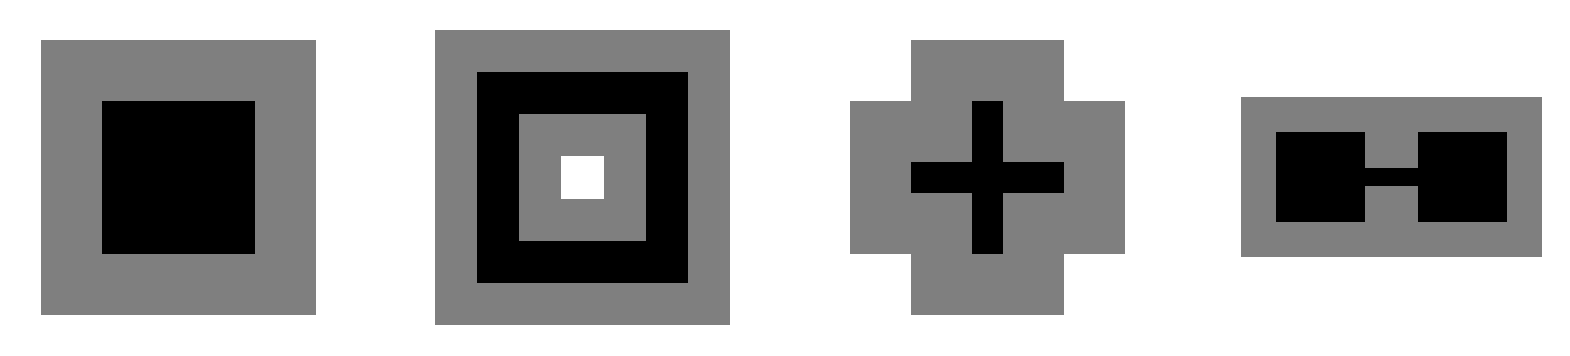

In [15]:
# Plot each set of dilation operations for a specific structuring element then add the original image in
for i in range(3):
    plt.figure(figsize=(20,15))
    # first subplot for 5x5 square dilation
    plt.subplot(3,4,i*4+1)
    plt.imshow(dilated_square[i]+square, cmap='gist_gray_r')
    plt.axis('off')
    # second subplot for 10x10 square dilation
    plt.subplot(3,4,i*4+2)
    plt.imshow(dilated_box[i]+box, cmap='gist_gray_r')
    plt.axis('off')
    # third subplot for plus shape dilation
    plt.subplot(3,4,i*4+3)
    plt.imshow(dilated_plus[i]+plus, cmap='gist_gray_r')
    plt.axis('off')
    # fourth subplot for dumbbell shape dilation
    plt.subplot(3,4,i*4+4)
    plt.imshow(dilated_dumbbell[i]+dumbbell, cmap='gist_gray_r')
    plt.axis('off')
    
    plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT6/' + str(i) + 'dilation_juxtaposed.png', dpi = 300, bbox_inches='tight')
    plt.show()

**The gray parts of the images above represent the areas where the dilation happened.**

## **ACTIVITY 6.1**

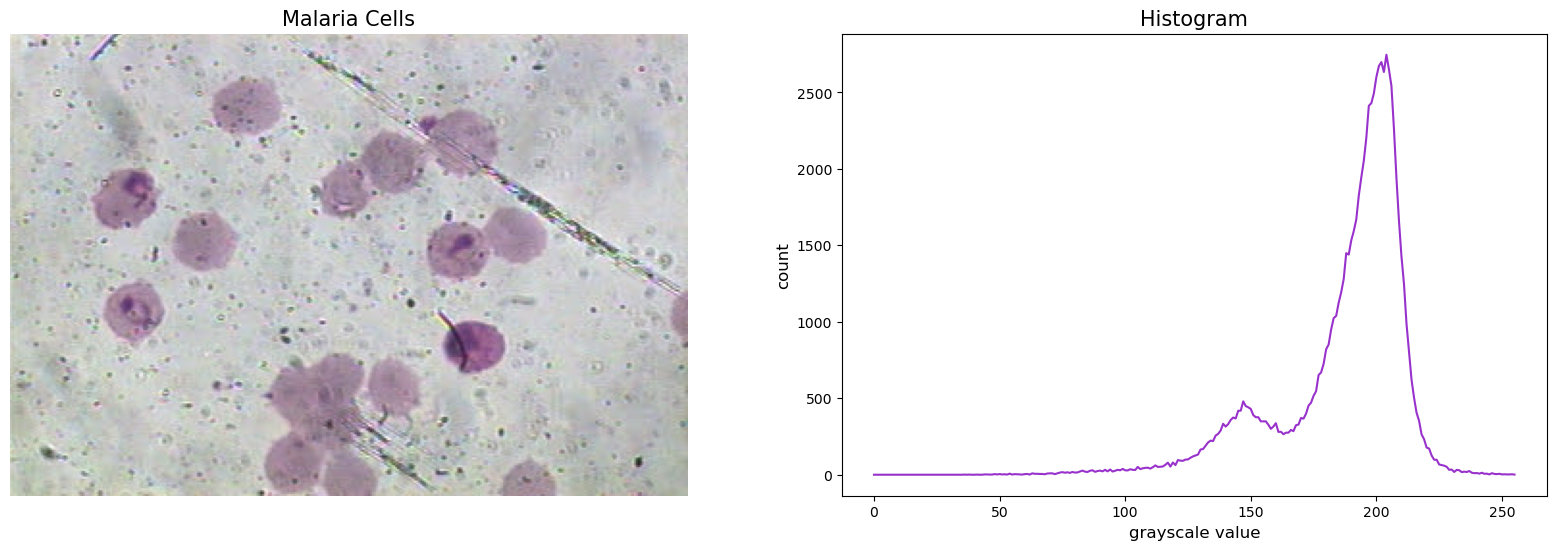

In [16]:
# Load in the malaria image
I = Image.open('/Users/Amogus/Downloads/malaria.jpeg')
# Convert the image to grayscale
Igray = Image.open('/Users/Amogus/Downloads/malaria.jpeg').convert('L')
Igray_arr = np.array(Igray)
# Array for grayscale values
vals = np.arange(256)
# Pixel count
pixels = Igray.histogram()

# Plot parameters
plt.figure(figsize=[20,6])
# First subplot for malaria image
plt.subplot(121)
plt.imshow(I)
plt.axis('off')
plt.title('Malaria Cells', fontsize=15)
# Second subplot for its histogram
plt.subplot(122)
plt.plot(vals, pixels, color='darkorchid')
plt.title('Histogram', fontsize=15)
plt.xlabel('grayscale value', fontsize=12)
plt.ylabel('count', fontsize=12)

plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT6/malaria_hist.png', dpi = 300, bbox_inches='tight')
plt.show()

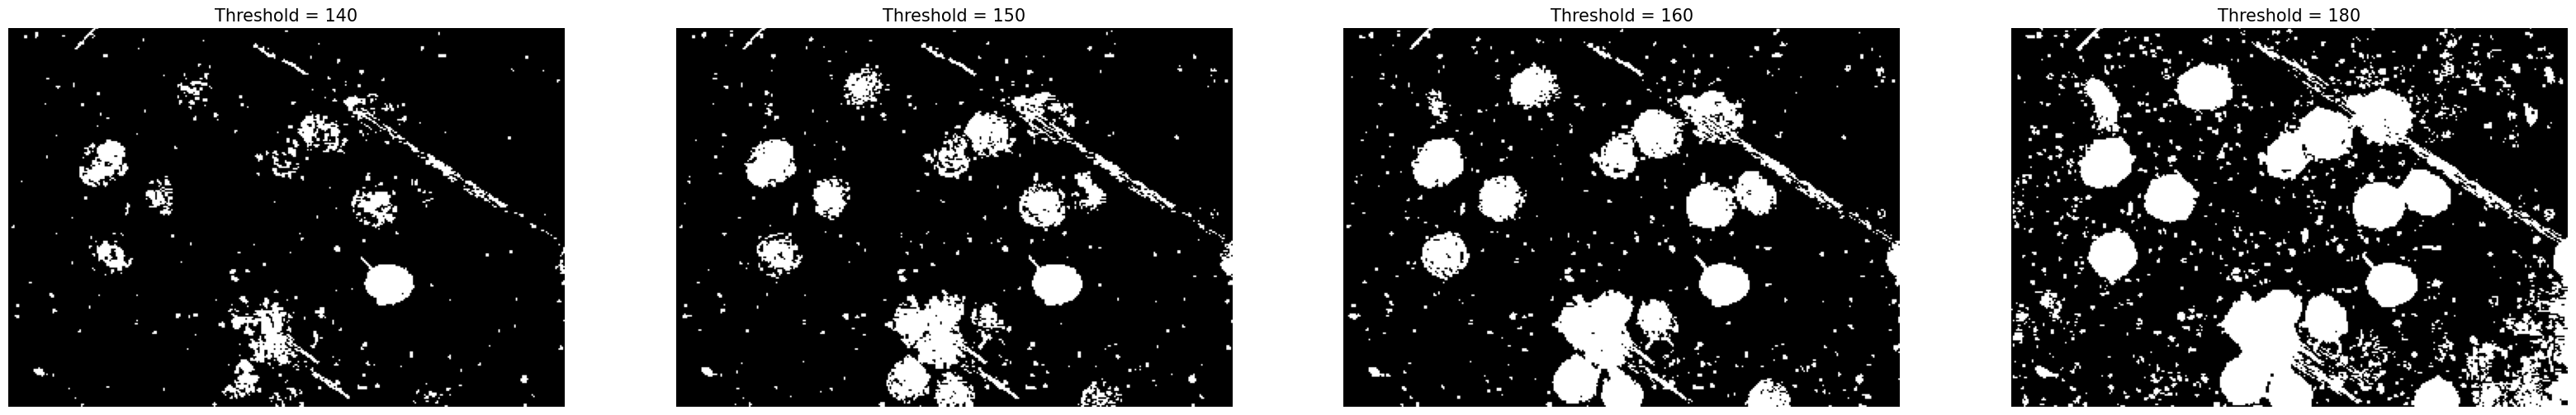

In [17]:
# Image thresholds
I1 = Igray_arr<140
I2 = Igray_arr<150
I3 = Igray_arr<160
I4 = Igray_arr<180

# Plot parameters
plt.figure(figsize=[40,15])
# First subplot for img<120
plt.subplot(141)
plt.imshow(I1, cmap='gray')
plt.axis('off')
plt.title('Threshold = 140', fontsize=15)
# Second subplot for img<140
plt.subplot(142)
plt.imshow(I2, cmap='gray')
plt.axis('off')
plt.title('Threshold = 150', fontsize=15)
# Third subplot for img<160
plt.subplot(143)
plt.imshow(I3, cmap='gray')
plt.axis('off')
plt.title('Threshold = 160', fontsize=15)
# Fourth subplot for img<180
plt.subplot(144)
plt.imshow(I4, cmap='gray')
plt.axis('off')
plt.title('Threshold = 180', fontsize=15)

plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT6/malaria_thresholded.png', dpi = 300, bbox_inches='tight')
plt.show()

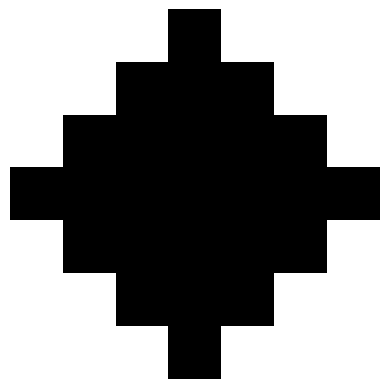

In [18]:
# Diamond structuring element
se_1 = np.zeros([7,7], dtype=np.uint8)
se_1[0, 3] = 1
se_1[6, 3] = 1
se_1[1, 2:5] = 1
se_1[5, 2:5] = 1
se_1[2:5, 1:6] = 1
se_1[3, 0] = 1
se_1[3, 6] = 1
plt.imshow(se_1, cmap='gray_r')
plt.axis('off')
plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT6/se_malaria_1.png', dpi = 300, bbox_inches='tight')
plt.show()

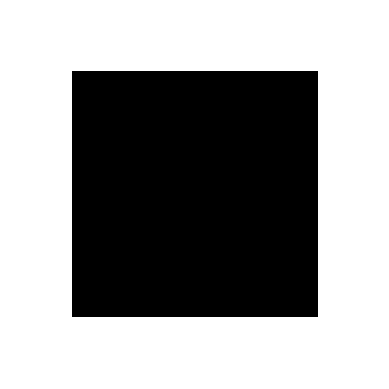

In [19]:
# Square structuring element
se_2 = np.zeros([6,6], dtype=np.uint8)
se_2[1:5, 1:5] = 1
plt.imshow(se_2, cmap='gray_r')
plt.axis('off')
plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT6/se_malaria_2.png', dpi = 300, bbox_inches='tight')
plt.show()

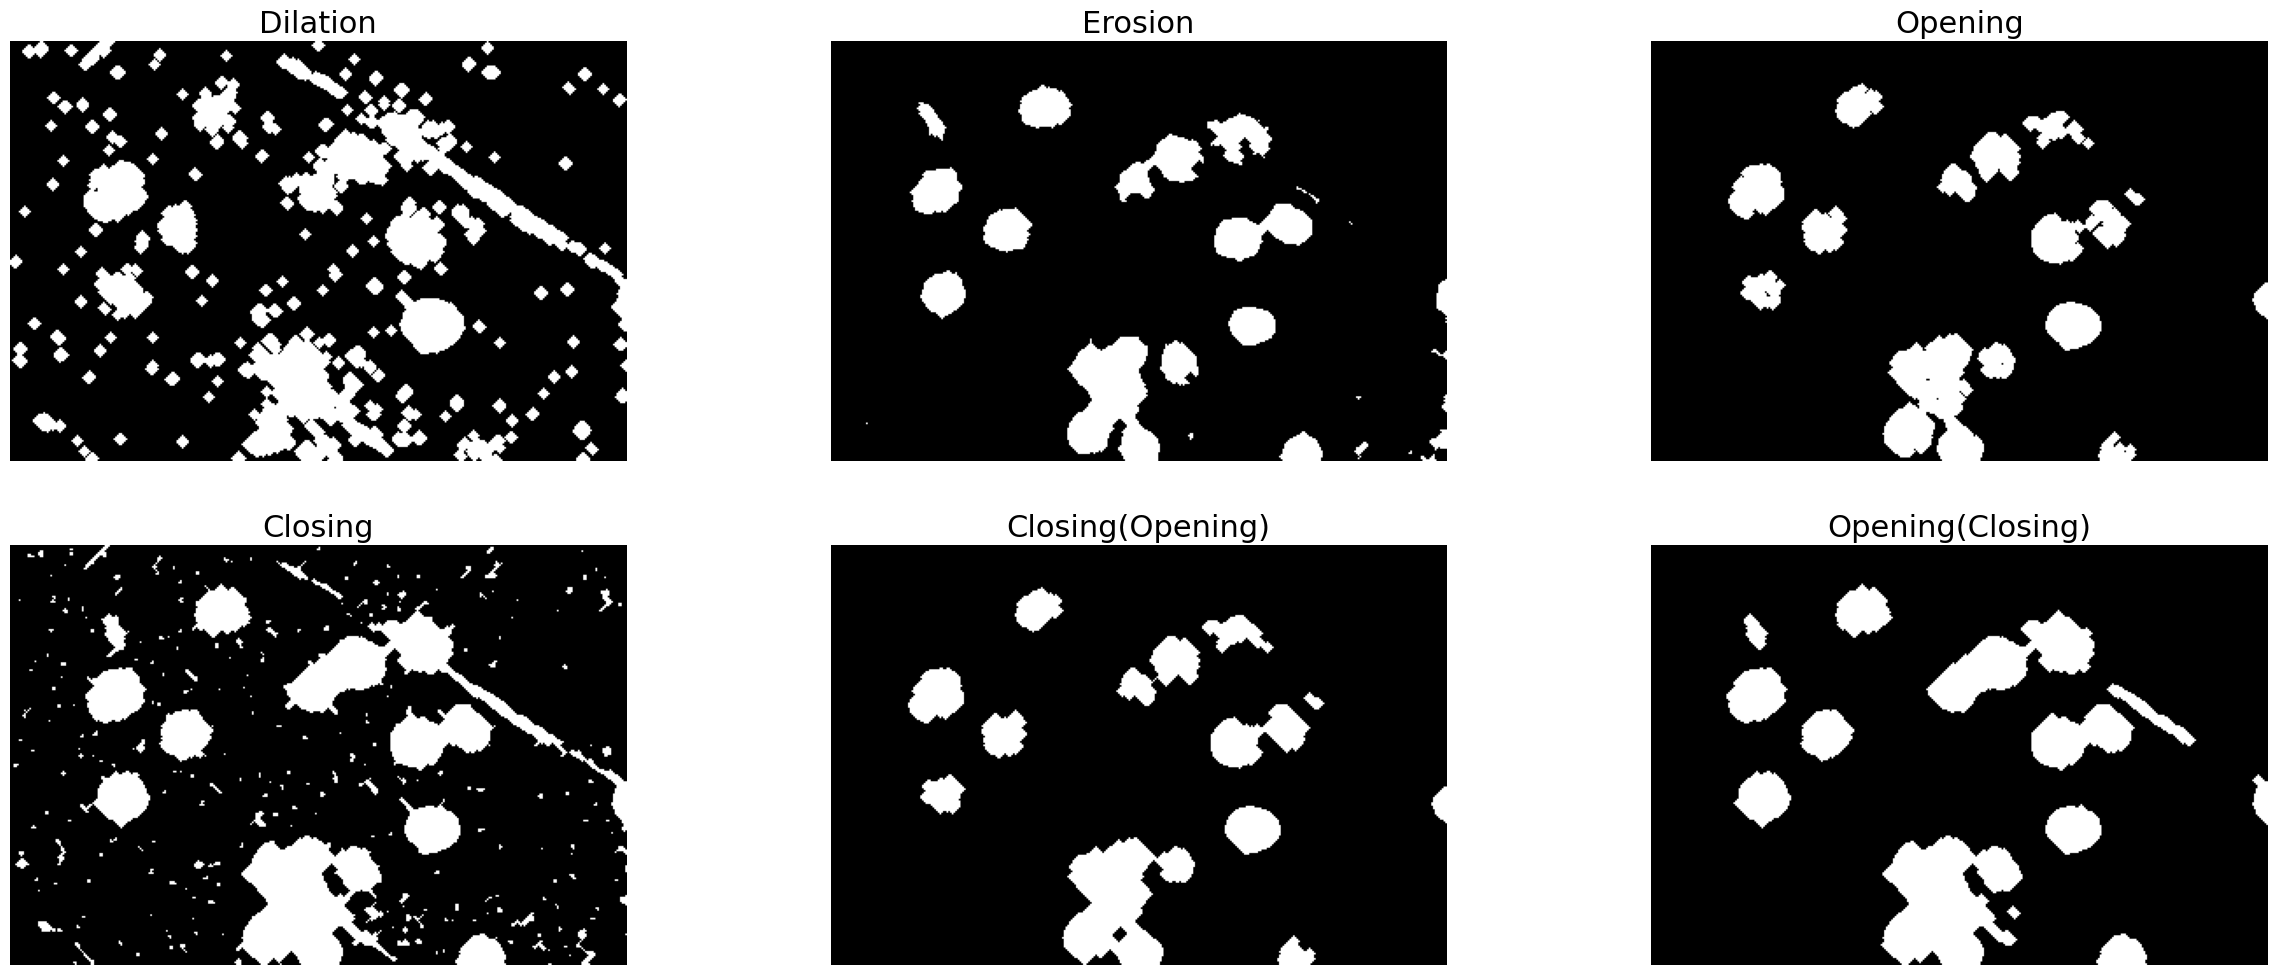

In [21]:
# Perform morphological operations using the diamond structuring element
malaria_d1 = dilation(I1, se_1)
malaria_e1 = erosion(I4, se_1)
malaria_c1 = closing(I3, se_1)
malaria_o1 = opening(I3, se_1)
malaria_oc1 = opening(malaria_c1, se_1)
malaria_co1 = closing(malaria_o1, se_1)

# Plot parameters
plt.figure(figsize=[30,12])
# First subplot for dilation operation
plt.subplot(231)
plt.imshow(malaria_d1, cmap='gray')
plt.axis('off')
plt.title('Dilation', fontsize=22)
# Second subplot for erosion operation
plt.subplot(232)
plt.imshow(malaria_e1, cmap='gray')
plt.axis('off')
plt.title('Erosion', fontsize=22)
# Third subplot for opening operation
plt.subplot(233)
plt.imshow(malaria_o1, cmap='gray')
plt.axis('off')
plt.title('Opening', fontsize=22)
# Fourth subplot for closing operation
plt.subplot(234)
plt.imshow(malaria_c1, cmap='gray')
plt.axis('off')
plt.title('Closing', fontsize=22)
# Fifth subplot for opening then closing operation
plt.subplot(235)
plt.imshow(malaria_co1, cmap='gray')
plt.axis('off')
plt.title('Closing(Opening)', fontsize=22)
# Sixth subplot for closing then opening operation
plt.subplot(236)
plt.imshow(malaria_oc1, cmap='gray')
plt.axis('off')
plt.title('Opening(Closing)', fontsize=22)

plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT6/malaria_morph_se1.png', dpi = 300, bbox_inches='tight')
plt.show()

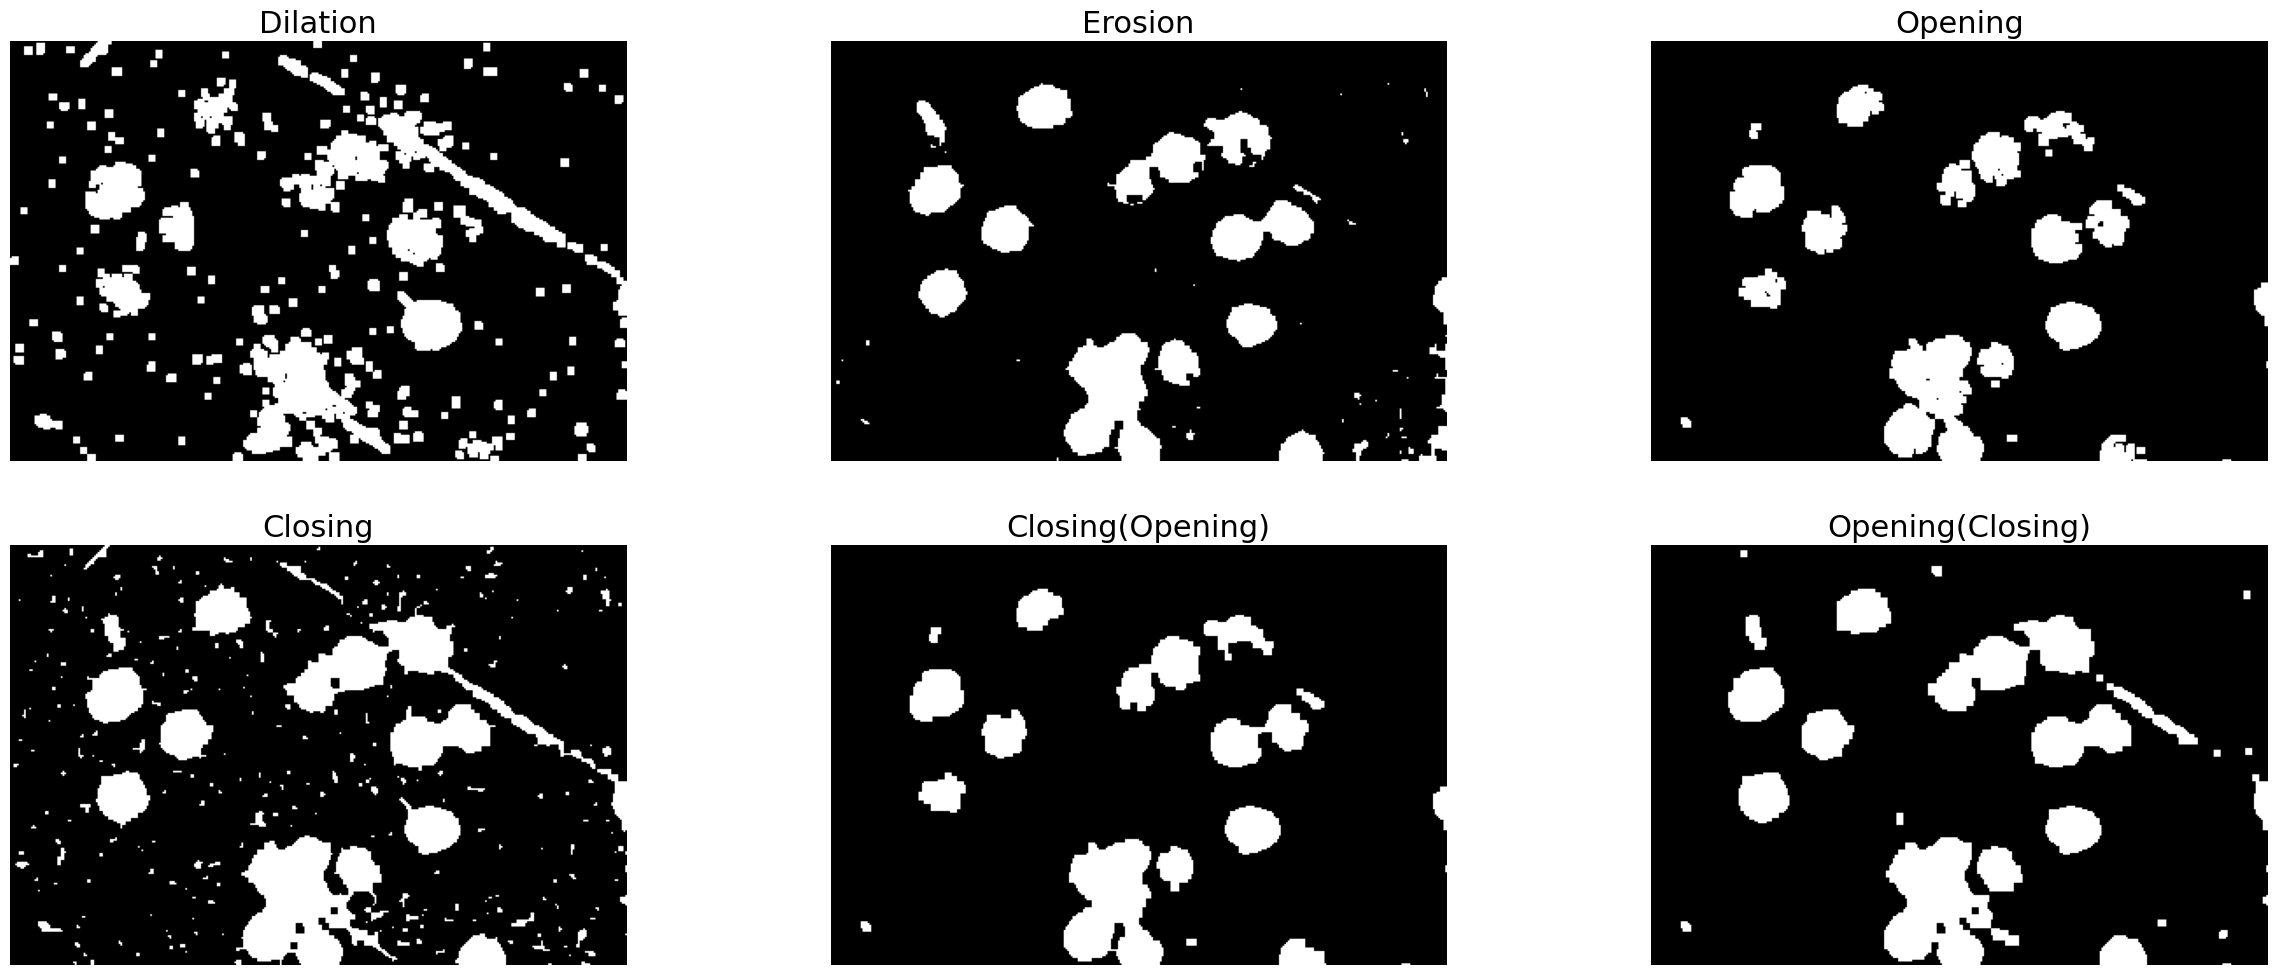

In [22]:
# Perform morphological operations using the square structuring element
malaria_d2 = dilation(I1, se_2)
malaria_e2 = erosion(I4, se_2)
malaria_c2 = closing(I3, se_2)
malaria_o2 = opening(I3, se_2)
malaria_oc2 = opening(malaria_c2, se_2)
malaria_co2 = closing(malaria_o2, se_2)

# Plot parameters
plt.figure(figsize=[30,12])
# First subplot for dilation operation
plt.subplot(231)
plt.imshow(malaria_d2, cmap='gray')
plt.axis('off')
plt.title('Dilation', fontsize=22)
# Second subplot for erosion operation
plt.subplot(232)
plt.imshow(malaria_e2, cmap='gray')
plt.axis('off')
plt.title('Erosion', fontsize=22)
# Third subplot for opening operation
plt.subplot(233)
plt.imshow(malaria_o2, cmap='gray')
plt.axis('off')
plt.title('Opening', fontsize=22)
# Fourth subplot for closing operation
plt.subplot(234)
plt.imshow(malaria_c2, cmap='gray')
plt.axis('off')
plt.title('Closing', fontsize=22)
# Fifth subplot for opening then closing operation
plt.subplot(235)
plt.imshow(malaria_co2, cmap='gray')
plt.axis('off')
plt.title('Closing(Opening)', fontsize=22)
# Sixth subplot for closing then opening operation
plt.subplot(236)
plt.imshow(malaria_oc2, cmap='gray')
plt.axis('off')
plt.title('Opening(Closing)', fontsize=22)

plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT6/malaria_morph_se2.png', dpi = 300, bbox_inches='tight')
plt.show()

**The first structuring element with the diamond shape performed better in removing the dust particles from the image with respect to the various morphological operations. However, in the operation that resulted to the best cleaned image which is that of the closing(opening) operation, the difference in performance of both structuring elements is negligible.**

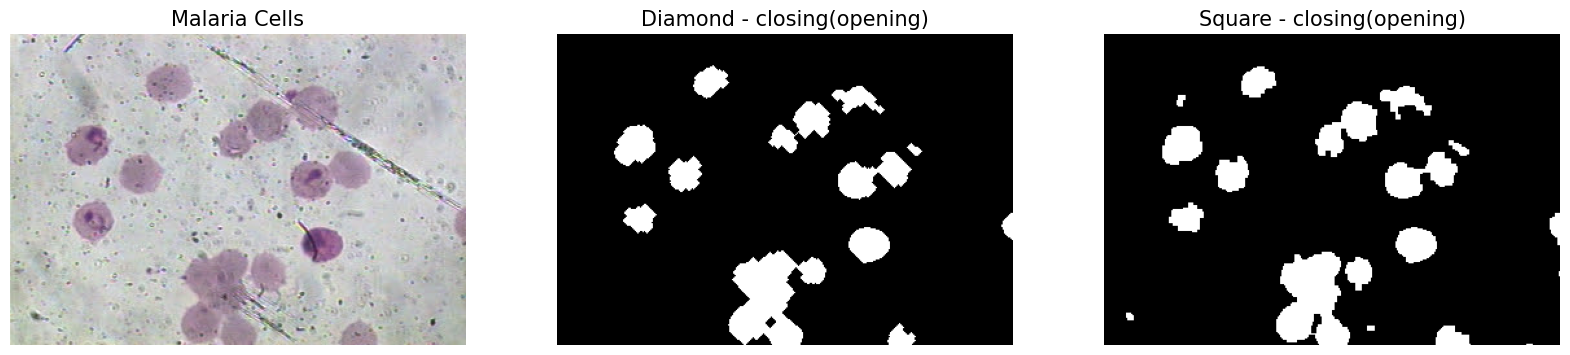

In [23]:
# Juxtaposition of original image together with the best performing operations for both structuring elements
# Plot parameters
plt.figure(figsize=[20,15])
# First subplot for original image
plt.subplot(131)
plt.imshow(I)
plt.axis('off')
plt.title('Malaria Cells', fontsize=15)
# Second subplot for closing(opening) operation using diamond structuring element
plt.subplot(132)
plt.imshow(malaria_co1, cmap='gray')
plt.axis('off')
plt.title('Diamond - closing(opening)', fontsize=15)
# Second subplot for closing(opening) operation using square structuring element
plt.subplot(133)
plt.imshow(malaria_co2, cmap='gray')
plt.axis('off')
plt.title('Square - closing(opening)', fontsize=15)

plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT6/malaria_bestresults.png', dpi = 300, bbox_inches='tight')
plt.show()